In [ ]:
%pip install --pre pycaret[full] -qq


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from pycaret.regression import setup
import shap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 資料處理

## 讀取資料與查看變數

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/數據科學/期中報告/Urban Air Quality and Health Impact Dataset.csv')
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

類別變數:\
1.City: 城市名稱，表示資料收集的城市（例如：Phoenix, San Diego, New York City）。\
Precip_Type: 降水類型（例如：雨、雪）。\
Severe_Risk: 嚴重天氣風險級別（例如：低、中、高）。\
Moon_Phase: 月相（例如：新月、滿月）。\
Conditions: 總體天氣狀況（例如：晴朗、多雲）。\
Description: 天氣的詳細描述（文字描述）。\
Icon: 天氣圖示表示（用於視覺化天氣狀況）。\
Stations: 提供資料的氣象站（可能是代碼或名稱）。\
Source: 資料來源資訊。\
Month: 月份（例如：1-12）。\
Season: 季節（例如：冬季、春季）。\
Day_of_Week: 星期幾（例如：Monday, Tuesday）。\
Is_Weekend: 是否為週末（布林值：是或否）。\
Condition_Code: 代表特定天氣狀況的代碼。

數值變數:\
Temp_Max: 當天的最高溫度（°F）。\
Temp_Min: 當天的最低溫度（°F）。\
Temp_Avg: 當天的平均溫度（°F）。\
Feels_Like_Max: 當天 "體感" 的最高溫度（°F）。\
Feels_Like_Min: 當天 "體感" 的最低溫度（°F）。\
Feels_Like_Avg: 當天 "體感" 的平均溫度（°F）。\
Dew_Point: 露點溫度（°F）。\
Humidity: 相對濕度（百分比）。\
Precipitation: 當天的總降水量（英吋）。\
Precip_Prob: 降水的機率（百分比）。\
Precip_Cover: 降水的覆蓋範圍（百分比）。\
Snow: 降雪量（英吋）。\
Snow_Depth: 雪深（英吋）。\
Wind_Gust: 當天的最大陣風速度（mph）。\
Wind_Speed: 當天的平均風速（mph）。\
Wind_Direction: 風向（以角度表示，0-360 度）。\
Pressure: 氣壓（hPa）。\
Cloud_Cover: 雲量覆蓋率（百分比）。\
Visibility: 能見度距離（英里）。\
Solar_Radiation: 太陽輻射（W/m²）。\
Solar_Energy: 接收到的太陽能量（kWh）。\
UV_Index: UV 指數等級。\
Sunrise: 日出的時間（HH:MM
，通常以時間表示）。\
Sunset: 日落的時間（HH:MM
，通常以時間表示）。\
Temp_Range: 當天的溫度範圍（最高溫與最低溫之間的差異）。\
Heat_Index: 當天的熱指數值。\
Severity_Score: 代表天氣條件嚴重程度的分數。\
Health_Risk_Score: 基於天氣和空氣質量的潛在健康風險分數。\

In [ ]:
pd.options.display.max_columns = None

print(df.describe())


       datetimeEpoch      tempmax      tempmin         temp  feelslikemax  \
count   1.000000e+03  1000.000000  1000.000000  1000.000000   1000.000000   
mean    1.726284e+09    85.106961    68.641638    76.115967     85.195384   
std     3.745834e+05     9.524231     8.474102     8.722070      9.496951   
min     1.725624e+09    62.035432    49.108218    55.548415     62.206413   
25%     1.725948e+09    78.661118    62.678245    69.102499     78.485332   
50%     1.726285e+09    84.322847    67.702405    75.222751     84.284077   
75%     1.726616e+09    91.653987    75.585109    82.396698     93.757026   
max     1.727021e+09   107.797400    91.635546    99.851684    105.060170   

       feelslikemin    feelslike          dew     humidity       precip  \
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      68.547548    76.323286    57.267120    56.782281     0.032135   
std        8.365809     8.621361     9.161517    16.708667     0.083461   
min   

可以了解數據是否有奇怪的地方

##處理缺失值

In [ ]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

,0
stations,93.3
preciptype,62.2
Condition_Code,43.1
snowdepth,7.1
sunrise,0.0
sunriseEpoch,0.0
sunset,0.0
sunsetEpoch,0.0
moonphase,0.0
conditions,0.0


只有Condition_Code、stations、preciptype、snowdepth有缺失值:

Condition_Code:因為不確定是什麼，而且有其他天氣相關的變數，所以不考慮此變數

stations:缺失值太高直接不考慮此變數

preciptype:只要是否紀錄下雨，所以處理得方式就是把缺失值填補為0代表沒下雨

snowdepth:因為有值全部都是0，所以也不考慮此變數



In [ ]:
df['preciptype'] = df['preciptype'].apply(lambda x: 1 if pd.notna(x) else 0)
df['preciptype']

,preciptype
0,0
1,0
2,0
3,1
4,1
...,...
995,1
996,1
997,0
998,0


#變數探索

##數值變數

### Health_Risk_Score

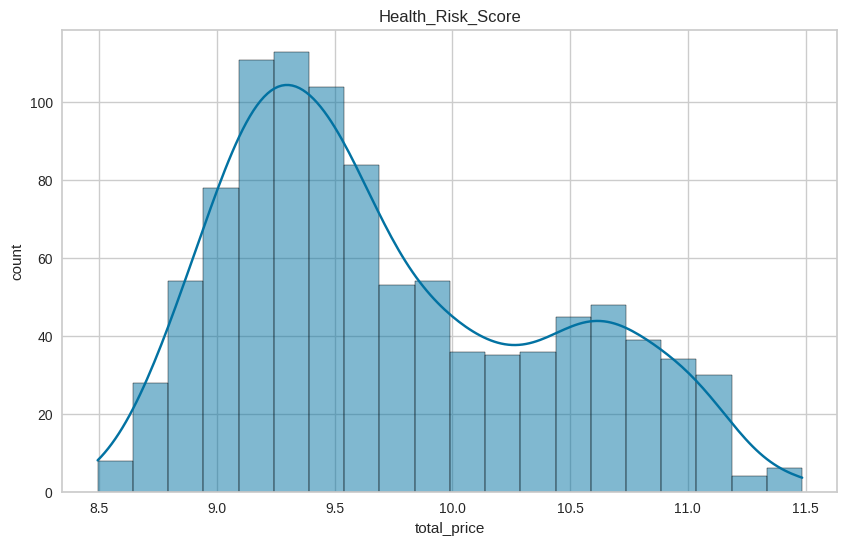

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Health_Risk_Score'], bins=20, kde=True)
plt.title('Health_Risk_Score')
plt.xlabel('total_price')
plt.ylabel('count')
plt.show()

風險分數越高代表風險越大，數據呈現右偏分布，數據大部分聚集在9到10之間，所以可能數據大於10就是高風險的狀態

### 溫度變數


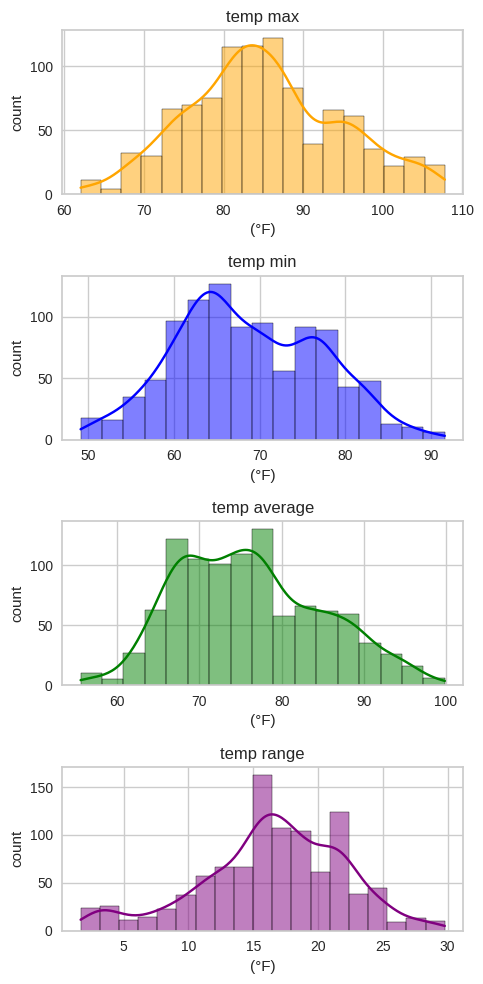

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(5, 10))
sns.histplot(df['tempmax'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('temp max')
axes[0].set_xlabel('(°F)')
axes[0].set_ylabel('count')

sns.histplot(df['tempmin'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('temp min')
axes[1].set_xlabel('(°F)')
axes[1].set_ylabel('count')


sns.histplot(df['temp'], kde=True, ax=axes[2], color='green')
axes[2].set_title('temp average')
axes[2].set_xlabel('(°F)')
axes[2].set_ylabel('count')

sns.histplot(df['Temp_Range'], kde=True, ax=axes[3], color='purple')
axes[3].set_title('temp range')
axes[3].set_xlabel('(°F)')
axes[3].set_ylabel('count')

plt.tight_layout()
plt.show()


這四個溫度的分布都沒有到很極端，且我們認為利用range 跟mean比較可以代表一整天的天氣狀態。

### 降雨變數


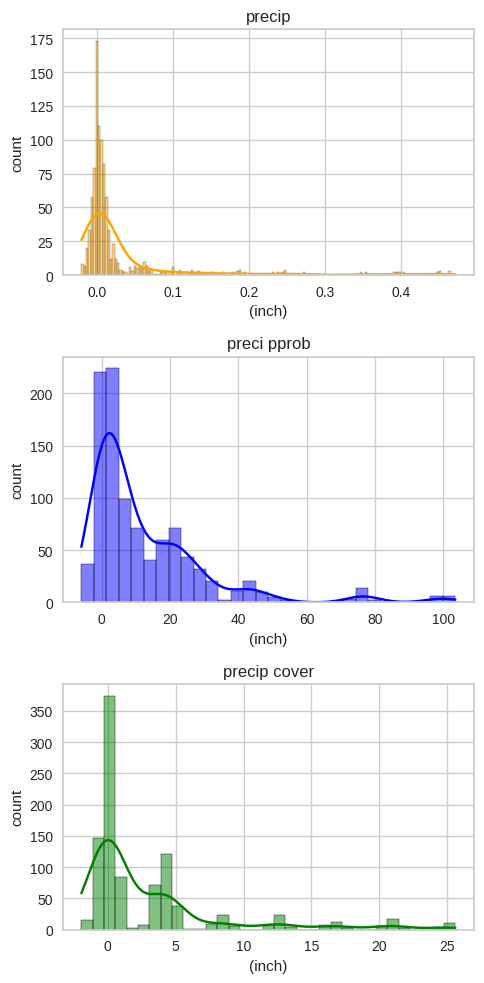

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
sns.histplot(df['precip'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('precip')
axes[0].set_xlabel('(inch)')
axes[0].set_ylabel('count')

sns.histplot(df['precipprob'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('preci pprob')
axes[1].set_xlabel('(inch)')
axes[1].set_ylabel('count')


sns.histplot(df['precipcover'], kde=True, ax=axes[2], color='green')
axes[2].set_title('precip cover')
axes[2].set_xlabel('(inch)')
axes[2].set_ylabel('count')



plt.tight_layout()
plt.show()

這三個降雨相關的圖有嚴重的右偏，而且還有負數的出現，我們覺得可能是資料填的時候就有錯誤，所以我們不會考慮這三個變數

###風速變數

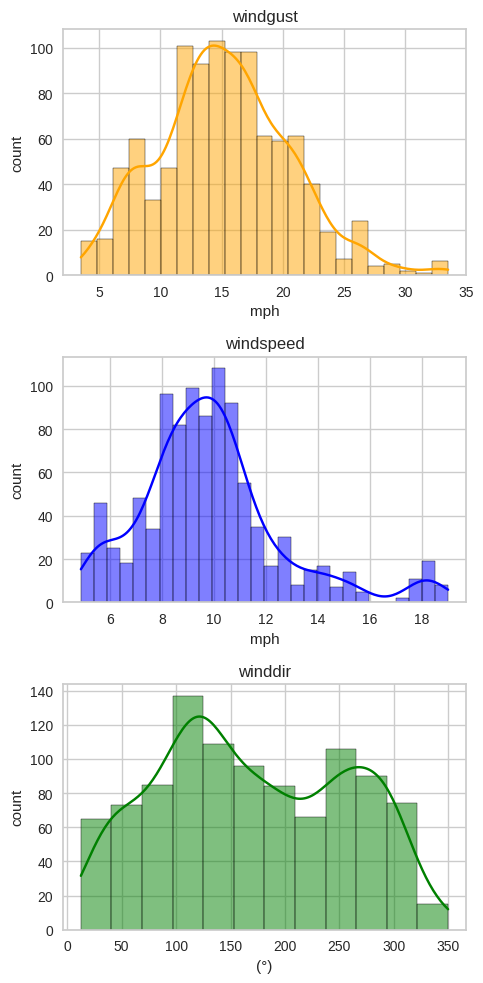

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(5, 10))
sns.histplot(df['windgust'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('windgust')
axes[0].set_xlabel('mph')
axes[0].set_ylabel('count')

sns.histplot(df['windspeed'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('windspeed')
axes[1].set_xlabel('mph')
axes[1].set_ylabel('count')


sns.histplot(df['winddir'], kde=True, ax=axes[2], color='green')
axes[2].set_title('winddir')
axes[2].set_xlabel('(°)')
axes[2].set_ylabel('count')



plt.tight_layout()
plt.show()

風速的部分最大風速與平均風速的分布較接近，那我們的想法是想要利用最大風速跟平均風速來製造一個新變數，可以了解風速有沒有很大的波動，通常極端氣候也是會影響到我們的健康。

###太陽變數

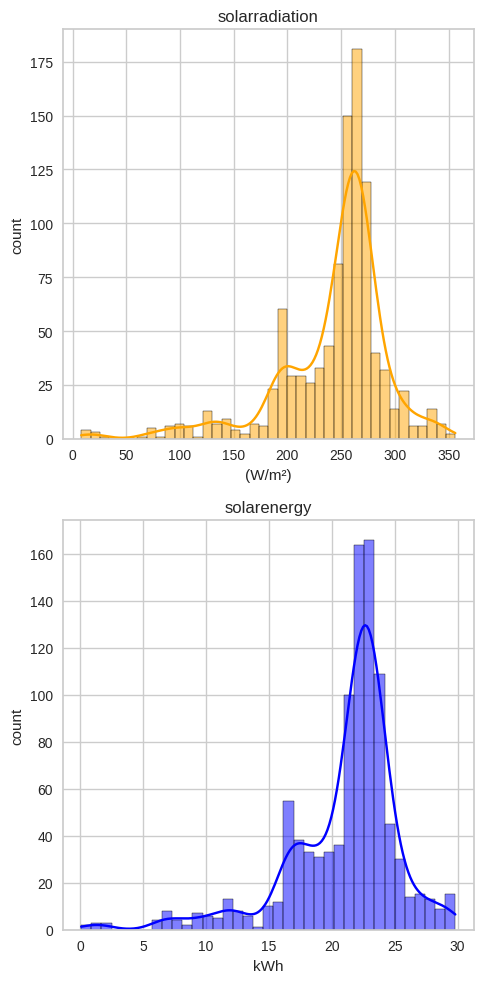

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
sns.histplot(df['solarradiation'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('solarradiation')
axes[0].set_xlabel('(W/m²)')
axes[0].set_ylabel('count')

sns.histplot(df['solarenergy'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('solarenergy')
axes[1].set_xlabel('kWh')
axes[1].set_ylabel('count')

plt.tight_layout()
plt.show()

In [ ]:
correlation = df['solarradiation'].corr(df['solarenergy'])
print(correlation)

0.9912955859677877


這兩個變數的分配會一樣的原因是一個是每平方米在單位時間內的能量輸入，一個是
每小時得能量輸入，所以這兩個變數會有共線性問題，所以我們會選擇只考慮solarradiation


## 類別變數

### 地區 vs 分數

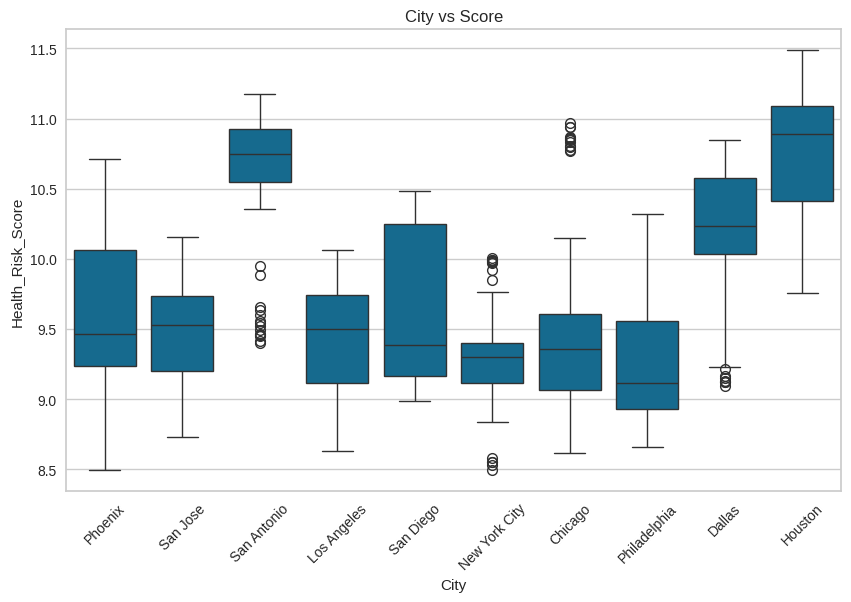

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y="Health_Risk_Score", data=df)
plt.title('City vs Score')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤
plt.show()

可以發現 San Antonio、 Dallas、 Houston這三個城市是相對其他風險較高的

工業和經濟活動：

Houston 和 Dallas 是美國主要的工業和經濟中心，尤其是 Houston 以石油、天然氣和化工產業聞名，這些產業容易排放大量污染物。


這些城市的高速成長和交通擁堵可能導致大量車輛排放，增加空氣污染。Dallas 和 Houston 作為德州大城市，依賴汽車出行，因此有較高的汽車污染物排放。


Houston 和 Dallas 位於德州，氣候較為炎熱、乾燥，夏季高溫可能增加臭氧形成，進一步惡化空氣品質。
San Jose 位於加州，屬地中海型氣候，但在炎熱的夏季，臭氧濃度也可能上升，對健康造成威脅。
地理環境：


德克薩斯州是一個經濟活動十分繁榮的州，擁有多樣的產業，以下是一些主要的產業和特點，可能會影響當地的健康風險分數：

石油與天然氣產業：德克薩斯州是美國最大的石油和天然氣生產州，這一產業對當地經濟影響深遠，但也與環境問題和健康風險（如空氣污染）有關的農業產業發達，特別是在牛肉生產、棉花和小麥等作物的種植方面。農業活動的增長也可能帶來環境和健康的挑戰，特別是在農藥使用方面 。

製造業：德克和汽車製造等。這些行業可能導致特定的健康風險，尤其是在工業污染方面 。

服務業：隨著人口的增長，服務業（包括醫療、教育和重要的地位。儘管服務業的健康影響相對較小，但對於促進居民的整體健康狀況仍有積極作用


這三個城市人口稠密，且城市擴張速度快，可能伴隨更多的污染源和較少的綠化空間。都市熱島效應會使城市溫度升高，加劇空氣污染和健康風險。
總的來說，這些城市的產業布局、交通依賴、氣候條件和地理環境可能共同影響其健康風險分數的偏高。

三者同屬於德克薩斯州



### 是否降雨vs分數

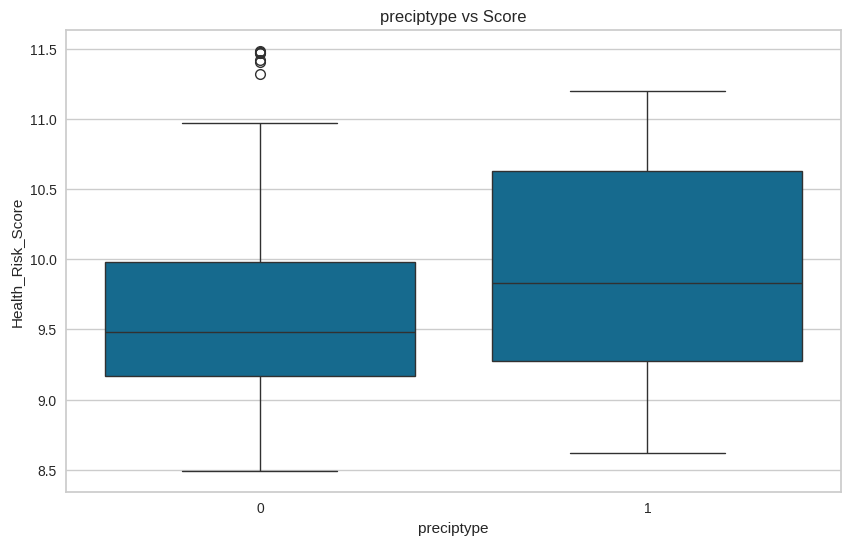

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='preciptype', y="Health_Risk_Score", data=df)
plt.title('preciptype vs Score')

plt.show()

可以看到雖然兩者差距不大，但有降雨的部分分數還是會相對高一些。

### 星期幾vs分數


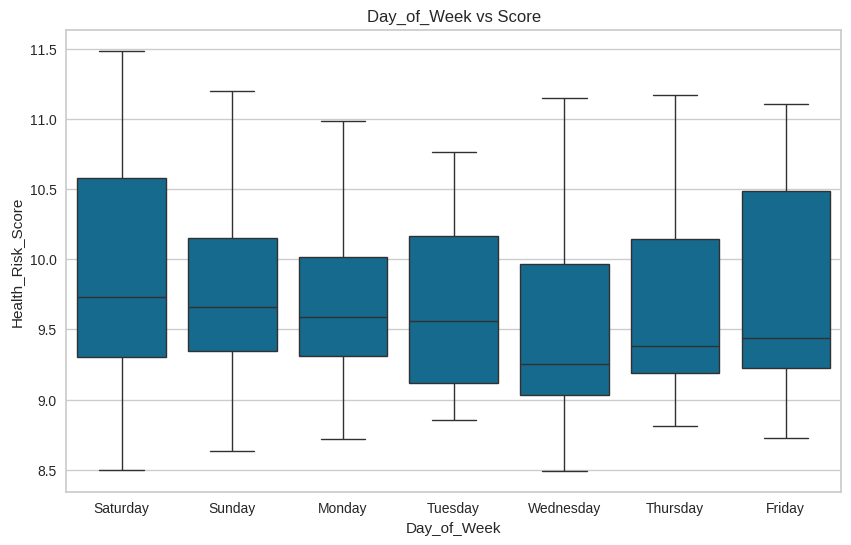

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y="Health_Risk_Score", data=df)
plt.title('Day_of_Week vs Score')

plt.show()

### 是否為周末vs分數

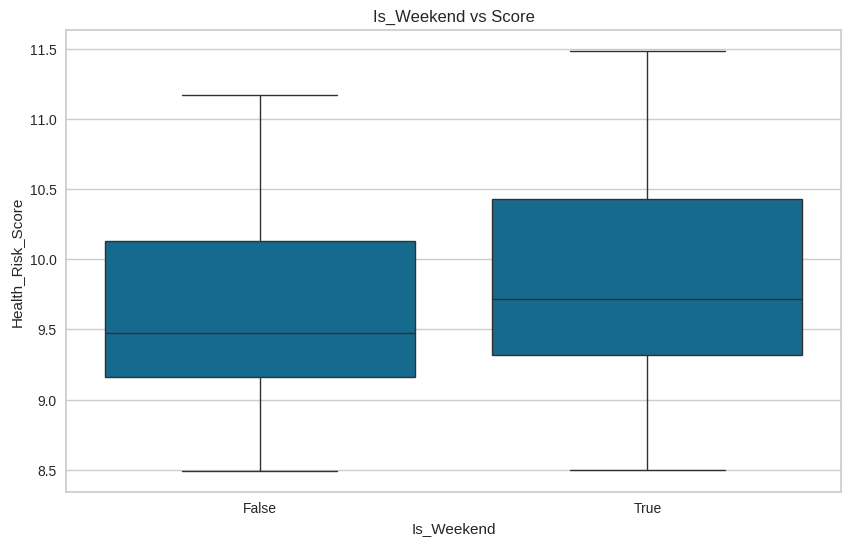

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Weekend', y="Health_Risk_Score", data=df)
plt.title('Is_Weekend vs Score')

plt.show()

## 特徵工程

### 新變數風速比率: max/average

In [ ]:
df['windratio'] = df['windgust'] / df['windspeed']


### 對城市做Target encoding


In [ ]:
mean_target = df.groupby('City')['Health_Risk_Score'].mean()
df['city_target_encoded'] = df['City'].map(mean_target)

###是否為周末改為0,1

In [ ]:
df['Is_Weekend'] = df['Is_Weekend'].apply(lambda x: 1 if str(x).upper() == "TRUE" else 0)


##相關係數熱圖

先刪除未知變數與同個類型變數(避免共線性問題)，剩餘變數:\
dew、humidity、pressure、cloudcover、solarradiation、Temp_Range、temp ,Heat_Index、windgust、windspeed

City、Is_Weekend、preciptype




In [ ]:
new_df = df.filter(items=['dew', 'windratio', 'humidity', 'pressure', 'cloudcover', 'solarradiation', 'Temp_Range', 'Heat_Index', 'city_target_encoded', 'Is_Weekend', 'preciptype', 'temp', 'Health_Risk_Score'])

<Axes: >

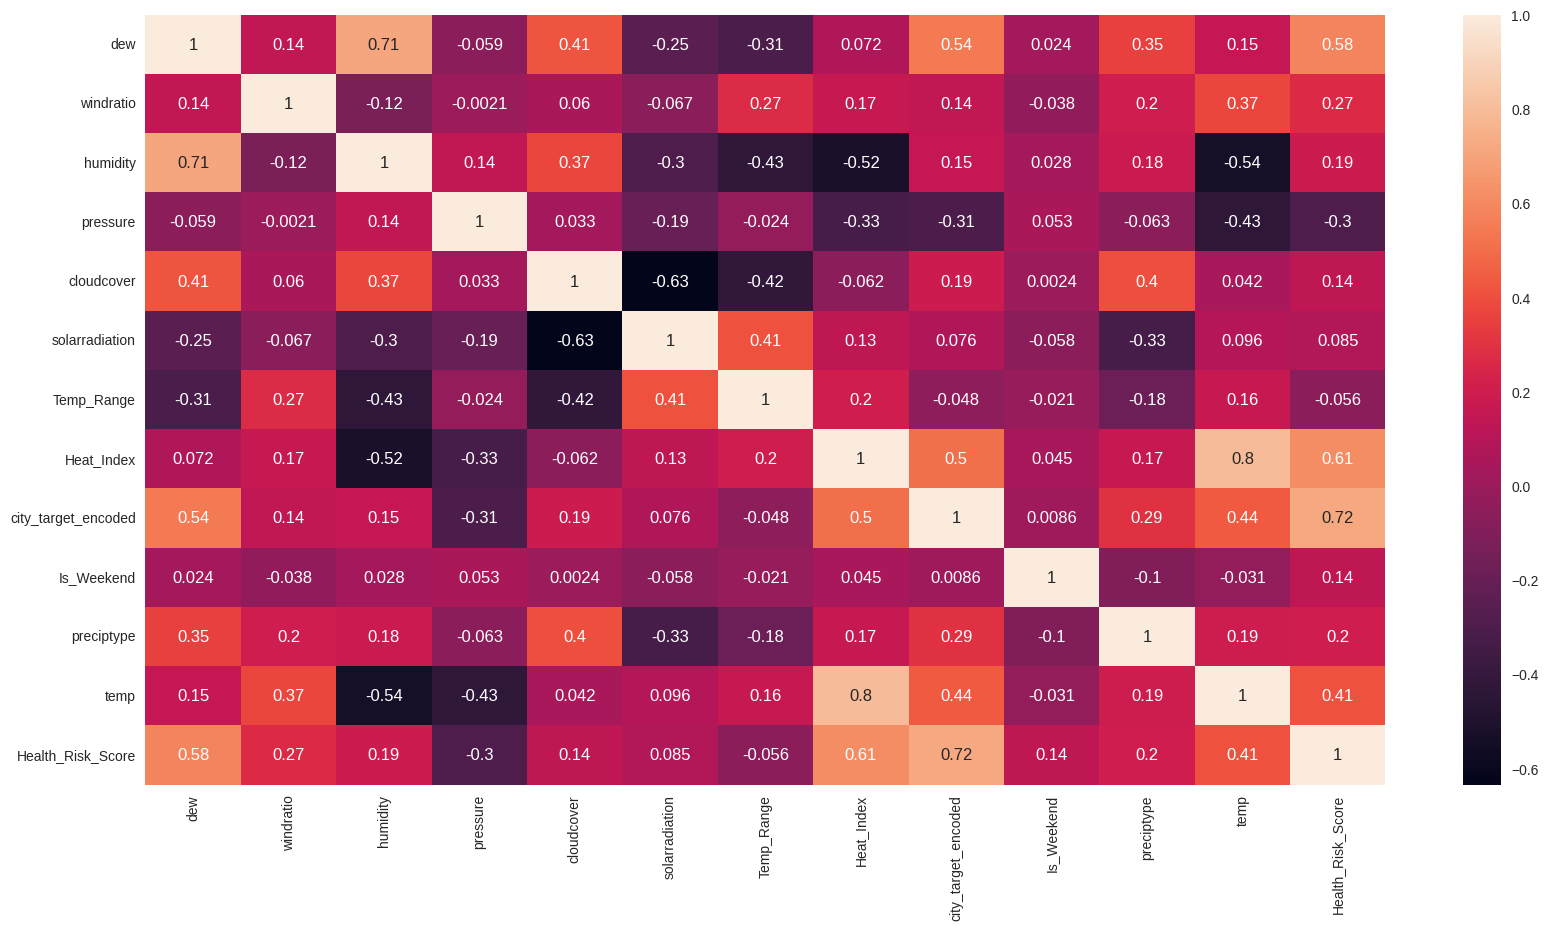

In [ ]:
new_df_h=new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(new_df_h,annot=True)

我們可以看到solarradiation 與 Temp_Ran的因為相關性太低，所以我們比較看看變數全放的模型比較與去掉這兩個變數的模型比較，如果相差不大我們可以考慮去除他們

# 模型分析

訓練集90% 測試集10%

##比較全模型與刪除相關性低的模型

###全模型

In [ ]:
train_set, test_set = train_test_split(new_df, test_size=0.1, random_state=2024)

In [ ]:
exp_reg = setup(
    data=train_set,
    target='Health_Risk_Score',
    train_size=0.90,
    session_id=2024,
    normalize=True,
)

,Description,Value
0,Session id,2024
1,Target,Health_Risk_Score
2,Target type,Regression
3,Original data shape,"(900, 13)"
4,Transformed data shape,"(900, 13)"
5,Transformed train set shape,"(810, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


訓練集中的10%為驗證集，且有做normalized

In [ ]:
models = compare_models(
    include=[
        'lr',
        'lasso',
        'ridge',
        'svm',
        'knn',
        'rf',
        'dt',
        'xgboost',


               ],
    fold=5,
    sort='MSE'
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,0.0947,0.0159,0.1259,0.9654,0.0116,0.0097,0.1080
rf,Random Forest Regressor,0.0941,0.0168,0.1285,0.9636,0.0120,0.0097,1.1760
knn,K Neighbors Regressor,0.0939,0.0183,0.1348,0.9605,0.0125,0.0097,0.0940
xgboost,Extreme Gradient Boosting,0.0993,0.0184,0.1348,0.9595,0.0126,0.0102,0.2420
dt,Decision Tree Regressor,0.1300,0.0474,0.2155,0.8977,0.0199,0.0134,0.0800
lr,Linear Regression,0.2059,0.0729,0.2691,0.8422,0.0248,0.0211,1.1100
ridge,Ridge Regression,0.2061,0.0729,0.2691,0.8422,0.0248,0.0211,0.0720
lasso,Lasso Regression,0.5781,0.4710,0.6854,-0.0161,0.0629,0.0588,0.0780


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

### 減少相關性太低的變數模型

In [ ]:
new_df_2 = df.filter(items=['dew', 'windratio', 'humidity', 'pressure', 'cloudcover', 'Heat_Index', 'city_target_encoded', 'Is_Weekend', 'preciptype', 'temp',  'Health_Risk_Score' ])

In [ ]:
train_set, test_set = train_test_split(new_df_2, test_size=0.1, random_state=2024)

In [ ]:
exp_reg = setup(
    data=train_set,
    target='Health_Risk_Score',
    train_size=0.90,
    session_id=2024,
    normalize=True,
)

,Description,Value
0,Session id,2024
1,Target,Health_Risk_Score
2,Target type,Regression
3,Original data shape,"(900, 11)"
4,Transformed data shape,"(900, 11)"
5,Transformed train set shape,"(810, 11)"
6,Transformed test set shape,"(90, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


訓練集中的10%為驗證集，且有做normalized


- Linear Regression
- Lasso Regression
- Ridge Regression
- Support Vector Regression (SVR)
- K-Nearest Neighbor (KNN) Regressor
- Decision Tree Regressor
- Random Forest Regressor
- XGBoost

In [ ]:
models = compare_models(
    include=[
        'lr',
        'lasso',
        'ridge',
        'svm',
        'knn',
        'rf',
        'dt',
        'xgboost',


               ],
    fold=5,
    sort='MSE'
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1010,0.0189,0.1367,0.9588,0.0128,0.0104,0.6580
svm,Support Vector Regression,0.1045,0.0194,0.1391,0.9578,0.0128,0.0107,0.1000
xgboost,Extreme Gradient Boosting,0.1091,0.0220,0.1478,0.9520,0.0138,0.0113,0.1940
knn,K Neighbors Regressor,0.1045,0.0241,0.1536,0.9488,0.0144,0.0108,0.0860
dt,Decision Tree Regressor,0.1335,0.0476,0.2156,0.8972,0.0201,0.0138,0.0360
lr,Linear Regression,0.2253,0.0819,0.2858,0.8223,0.0265,0.0232,0.0580
ridge,Ridge Regression,0.2254,0.0819,0.2858,0.8223,0.0265,0.0232,0.0660
lasso,Lasso Regression,0.5781,0.4710,0.6854,-0.0161,0.0629,0.0588,0.0640


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

這兩個模型最好的前兩個都是svm與rf，我們也發現其實少了這兩個變數之後整體模型效果相差不大，所以我們會選擇刪除兩個相關性較低的變數，讓模型不要太複雜

## 模型解釋性

####隨機森林

In [ ]:
rf = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1121,0.0250,0.1581,0.9403,0.0150,0.0116
1,0.1002,0.0178,0.1335,0.9584,0.0125,0.0104
2,0.0900,0.0141,0.1188,0.9754,0.0109,0.0091
3,0.1023,0.0197,0.1405,0.9600,0.0129,0.0104
4,0.0834,0.0129,0.1135,0.9702,0.0107,0.0087
5,0.0895,0.0142,0.1191,0.9681,0.0112,0.0093
6,0.0885,0.0135,0.1161,0.9674,0.0109,0.0091
7,0.0984,0.0168,0.1297,0.9641,0.0121,0.0101
8,0.1131,0.0221,0.1486,0.9549,0.0140,0.0117


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

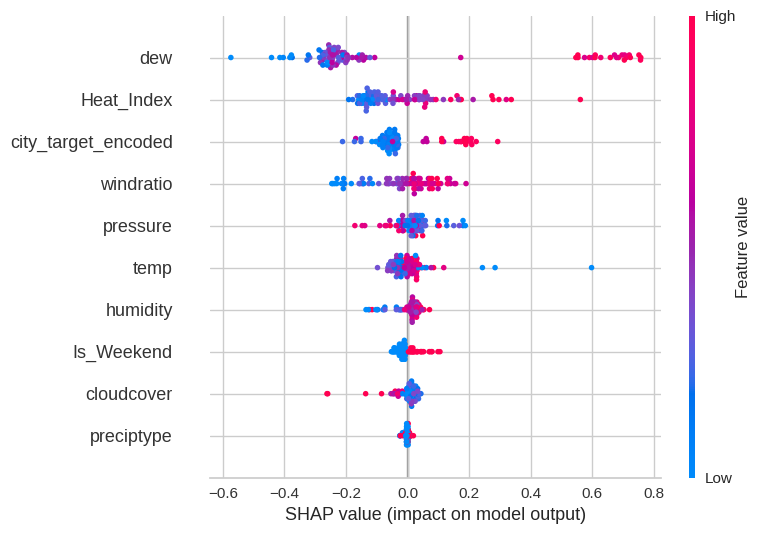

In [ ]:
interpret_model(rf)

大部分數據都是變數的值上升，風險也是上升的
只有pressuree有潛在可能如果值下降，風險是上升的

而在dew有很明確的分布，代表這可能是影響風險很重要的因素(紅跟藍分比較開)

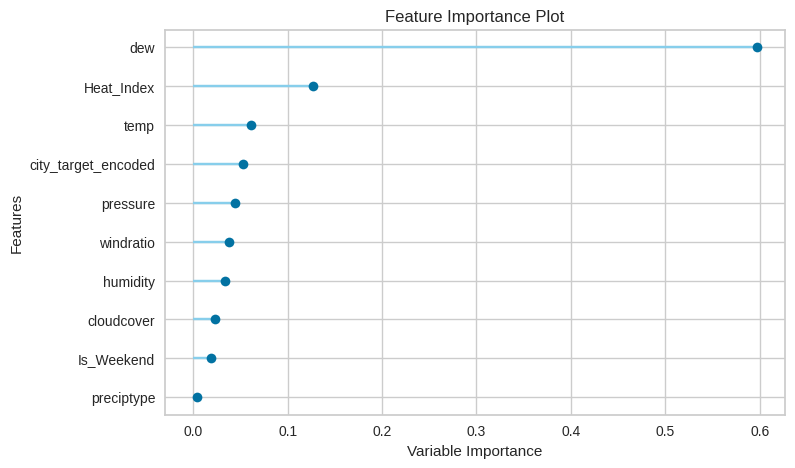

In [ ]:
plot_model(rf, plot = 'feature')

可以看出dew確實是對預測風險是一個很重要的變數，其次是Heat_index

#### SVM

In [ ]:
svm = create_model('svm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1074,0.0192,0.1385,0.9542,0.0130,0.0111
1,0.1022,0.0181,0.1344,0.9578,0.0124,0.0106
2,0.0986,0.0175,0.1323,0.9696,0.0120,0.0100
3,0.0982,0.0160,0.1266,0.9675,0.0117,0.0100
4,0.1072,0.0213,0.1460,0.9508,0.0133,0.0110
5,0.0898,0.0132,0.1149,0.9703,0.0108,0.0093
6,0.1078,0.0206,0.1434,0.9503,0.0133,0.0110
7,0.1010,0.0198,0.1407,0.9577,0.0128,0.0102
8,0.1162,0.0241,0.1552,0.9508,0.0144,0.0120


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from sklearn.svm import SVR
X_train = train_set.drop('Health_Risk_Score', axis=1)
y_train = train_set['Health_Risk_Score']
svm_model = SVR(
    C=1.0,
    cache_size=200,
    coef0=0.0,
    degree=3,
    epsilon=0.1,
    gamma='scale',
    kernel='rbf',
    max_iter=-1,
    shrinking=True,
    tol=0.001,
    verbose=False
)
svm_model.fit(X_train, y_train)

SVR()

In [ ]:
X_test = test_set.drop('Health_Risk_Score', axis=1)
explainer = shap.KernelExplainer(model= svm_model.predict, data=X_train[:50])
shap_values = explainer.shap_values(X=X_test, nsamples=100)
# 計算 SHAP 值


  0%|          | 0/100 [00:00<?, ?it/s]

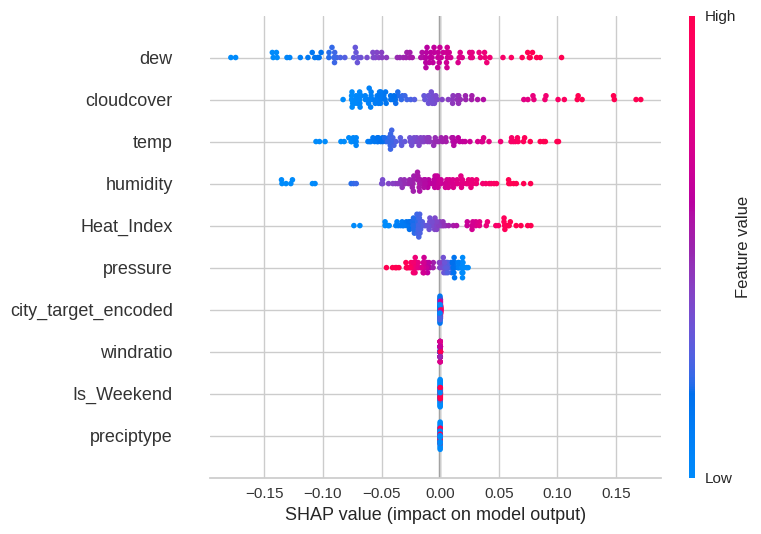

In [ ]:
shap.summary_plot(shap_values, X_test)



也是一樣大部分都是值增加風險也是增加了，除了pressure。

#模型比較

In [ ]:
svm = create_model('svm')
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1074,0.0192,0.1385,0.9542,0.0130,0.0111
1,0.1022,0.0181,0.1344,0.9578,0.0124,0.0106
2,0.0986,0.0175,0.1323,0.9696,0.0120,0.0100
3,0.0982,0.0160,0.1266,0.9675,0.0117,0.0100
4,0.1072,0.0213,0.1460,0.9508,0.0133,0.0110
5,0.0898,0.0132,0.1149,0.9703,0.0108,0.0093
6,0.1078,0.0206,0.1434,0.9503,0.0133,0.0110
7,0.1010,0.0198,0.1407,0.9577,0.0128,0.0102
8,0.1162,0.0241,0.1552,0.9508,0.0144,0.0120


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1121,0.0250,0.1581,0.9403,0.0150,0.0116
1,0.1002,0.0178,0.1335,0.9584,0.0125,0.0104
2,0.0900,0.0141,0.1188,0.9754,0.0109,0.0091
3,0.1023,0.0197,0.1405,0.9600,0.0129,0.0104
4,0.0834,0.0129,0.1135,0.9702,0.0107,0.0087
5,0.0895,0.0142,0.1191,0.9681,0.0112,0.0093
6,0.0885,0.0135,0.1161,0.9674,0.0109,0.0091
7,0.0984,0.0168,0.1297,0.9641,0.0121,0.0101
8,0.1131,0.0221,0.1486,0.9549,0.0140,0.0117


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predictions = predict_model(svm, data=test_set)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,0.0886,0.0122,0.1106,0.9720,0.0104,0.0092


In [ ]:
predictions = predict_model(rf, data=test_set)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0737,0.0097,0.0984,0.9779,0.0094,0.0077


最終在test_set上的rf模型全部的指標都是贏過svm的，如果要選一個模型我會選擇rf